In [1]:
import pandas as pd

# Load the dataset
reviews_df = pd.read_excel('user_review.xls')


In [2]:
reviews_df.head()

,id,review
0,1,I love this app! It is so useful and easy to use.
1,2,Terrible experience. The app crashes all the t...
2,3,Decent app but needs improvement in the UI.
3,4,Fantastic! This app has changed my life.
4,5,"The app is okay, but it lacks many features."


In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50 non-null     int64 
 1   review  50 non-null     object
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes


In [4]:
reviews_df.describe()

,id
count,50.00000
mean,25.50000
std,14.57738
min,1.00000
25%,13.25000
50%,25.50000
75%,37.75000
max,50.00000


In [5]:
import string


In [6]:
# Define a function for basic text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [8]:
# Apply the preprocessing function to the 'review' column
reviews_df['review'] = reviews_df['review'].apply(preprocess_text)


In [9]:
reviews_df.head()

,id,review
0,1,i love this app it is so useful and easy to use
1,2,terrible experience the app crashes all the time
2,3,decent app but needs improvement in the ui
3,4,fantastic this app has changed my life
4,5,the app is okay but it lacks many features


In [10]:
from textblob import TextBlob

# Define a function to get the sentiment of a review
def get_sentiment(review):
    analysis = TextBlob(review)
    # Classify the sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [11]:
# Apply the function to the 'review' column
reviews_df['sentiment'] = reviews_df['review'].apply(get_sentiment)


In [12]:
reviews_df.head()

,id,review,sentiment
0,1,i love this app it is so useful and easy to use,positive
1,2,terrible experience the app crashes all the time,negative
2,3,decent app but needs improvement in the ui,positive
3,4,fantastic this app has changed my life,positive
4,5,the app is okay but it lacks many features,positive


In [13]:
import matplotlib.pyplot as plt

# Count the number of each sentiment
sentiment_counts = reviews_df['sentiment'].value_counts()


In [14]:
sentiment_counts

sentiment
positive    32
negative    10
neutral      8
Name: count, dtype: int64

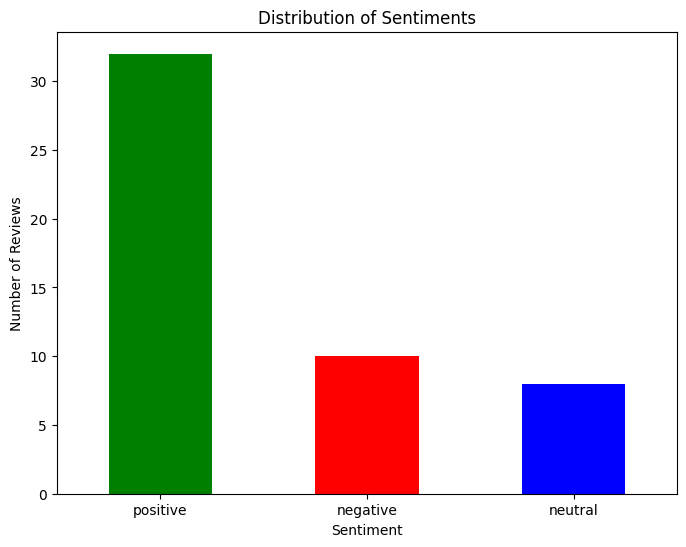

In [15]:
# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

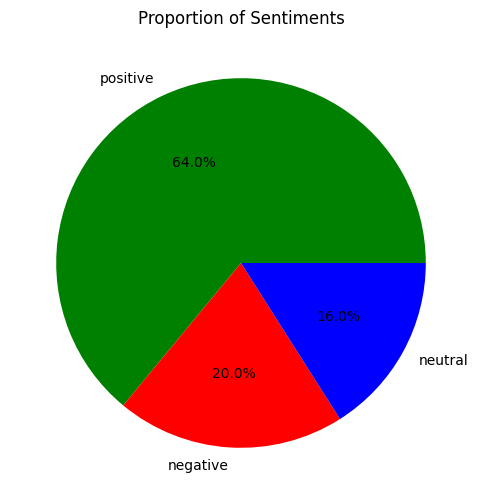

In [16]:
# Plot 1: Pie Chart of Sentiment Distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Proportion of Sentiments')
plt.ylabel('')
plt.show()

In [19]:
from wordcloud import WordCloud


In [20]:
# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


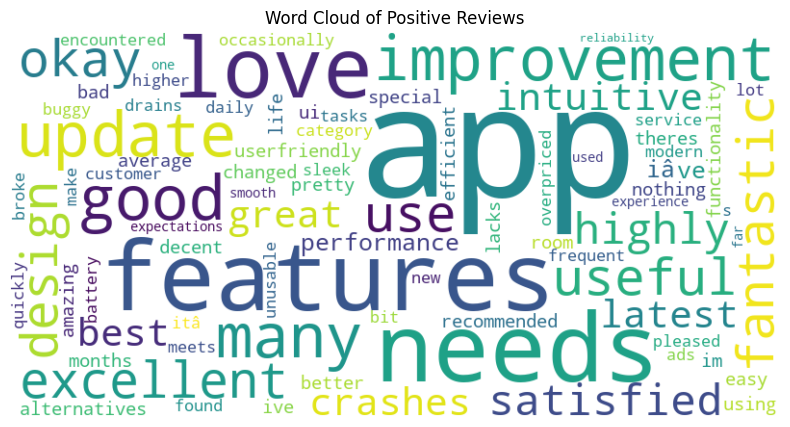

In [21]:

# Plot 2: Word Cloud of Positive Reviews
positive_reviews = ' '.join(reviews_df[reviews_df['sentiment'] == 'positive']['review'])
generate_wordcloud(positive_reviews, 'Word Cloud of Positive Reviews')


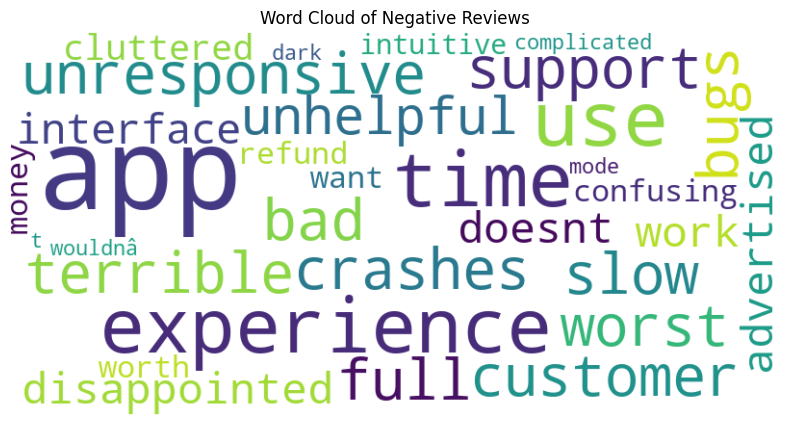

In [22]:
# Plot 3: Word Cloud of Negative Reviews
negative_reviews = ' '.join(reviews_df[reviews_df['sentiment'] == 'negative']['review'])
generate_wordcloud(negative_reviews, 'Word Cloud of Negative Reviews')